In [ ]:
!pip install pandas

In [2]:
import pandas as pd
data=pd.read_csv("C:/Users/Hp/Downloads/ICRISAT-District Level Data - ICRISAT-District Level Data.csv")

In [6]:
df.replace(-1,0,inplace=True) # used to fill 0 value in oilseed data instead of -1 

In [9]:
#Top 7 RICE PRODUCTION State Data(Bar_plot)
rice=df.groupby("State Name")["RICE PRODUCTION (1000 tons)"].sum().reset_index()
rice.columns=["State Name", "Total Rice Prodcution(1000 tons)"]
top7_rice_production=rice.nlargest(7,"Total Rice Prodcution(1000 tons)")

In [ ]:
!pip install matplotlib

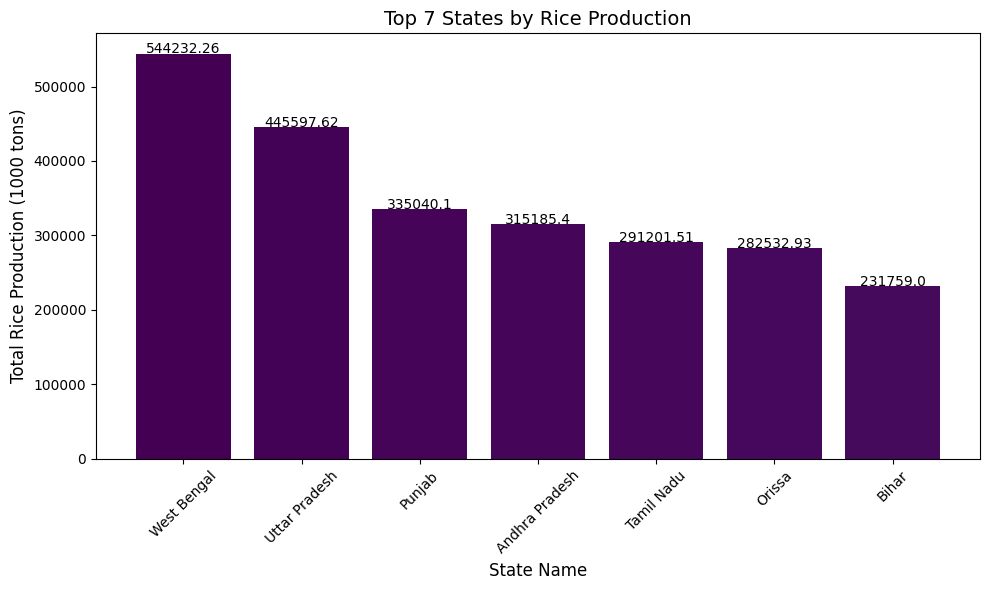

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(range(len(top7_rice_production)))
plt.bar(top7_rice_production["State Name"],top7_rice_production["Total Rice Prodcution(1000 tons)"],color=colors)

plt.xlabel("State Name", fontsize=12)
plt.ylabel("Total Rice Production (1000 tons)", fontsize=12)
plt.title("Top 7 States by Rice Production", fontsize=14)

plt.xticks(rotation=45)

for i, value in enumerate(top7_rice_production["Total Rice Prodcution(1000 tons)"]):
    plt.text(i, value + 200, str(value), ha='center', fontsize=10)

plt.tight_layout()

plt.show()


In [12]:
#Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)
wheat=df.groupby("State Name")["WHEAT PRODUCTION (1000 tons)"].sum().reset_index()
wheat.columns=["State Name", "Total Wheat production(1000 tons)"]
total=wheat["Total Wheat production(1000 tons)"].sum()
wheat["percentage of total wheat production"]=(wheat["Total Wheat production(1000 tons)"]/total)*100
wheat["percentage of total wheat production"]=wheat["percentage of total wheat production"].round(2)
top5_wheat_production=wheat.nlargest(5,"Total Wheat production(1000 tons)")

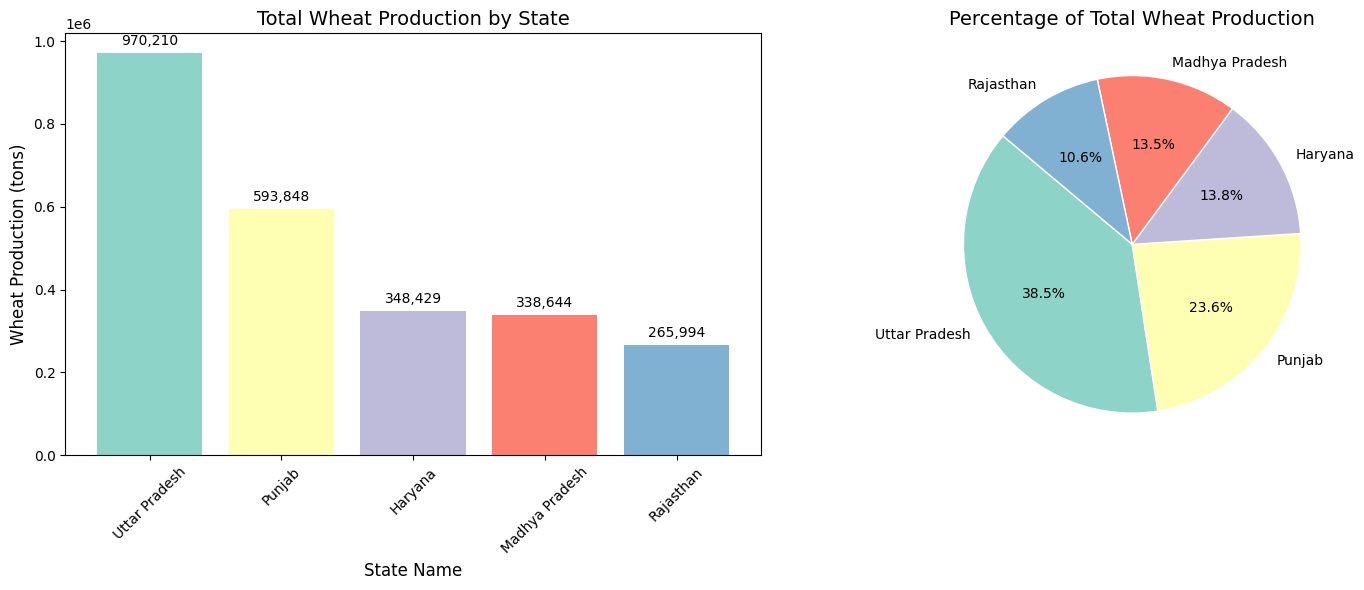

In [13]:
#Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)
import matplotlib.pyplot as plt
colors = plt.cm.Set3.colors[:len(df)]  # pick 5 distinct colors
# Create a figure with 1 row, 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(top5_wheat_production["State Name"], top5_wheat_production["Total Wheat production(1000 tons)"], color=colors)
ax1.set_title("Total Wheat Production by State", fontsize=14)
ax1.set_xlabel("State Name", fontsize=12)
ax1.set_ylabel("Wheat Production (tons)", fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Optional: Annotate values on top of bars
for i, value in enumerate(top5_wheat_production["Total Wheat production(1000 tons)"]):
    ax1.text(i, value + 20000, f"{int(value):,}", ha='center', fontsize=10)

# --- Pie Chart: Percentage of Total Wheat Production ---
ax2.pie(top5_wheat_production["percentage of total wheat production"], labels=top5_wheat_production["State Name"], colors=colors, 
        autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})
ax2.set_title("Percentage of Total Wheat Production", fontsize=14)

# Improve layout
plt.tight_layout()
plt.show()



In [14]:
#Oil seed production by top 5 states
oil=df.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"].sum().reset_index()
oil.columns=["State Name", "Total oilseeds Production(1000 tons)"]
top5_oilseeds_production=oil.nlargest(5,"Total oilseeds Production(1000 tons)")
top5_oilseeds_production

,State Name,Total oilseeds Production(1000 tons)
10,Madhya Pradesh,153705.79
4,Gujarat,126314.01
14,Rajasthan,122726.86
11,Maharashtra,95567.91
0,Andhra Pradesh,76888.09


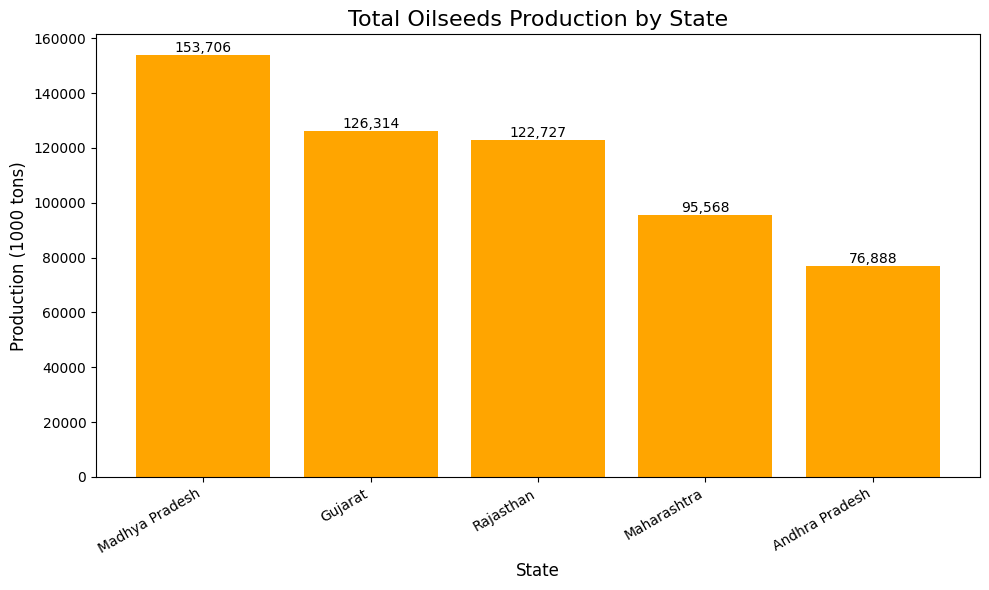

In [19]:
#plot for oilseed Production
plt.figure(figsize=(10, 6))
bars = plt.bar(top5_oilseeds_production["State Name"],top5_oilseeds_production["Total oilseeds Production(1000 tons)"], color='orange')

# Add labels & title
plt.title("Total Oilseeds Production by State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Production (1000 tons)", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=30, ha='right')

# Add value labels on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.0f}",
        ha='center', va='bottom', fontsize=10
    )

# Show plot
plt.tight_layout()
plt.show()

In [20]:
#Top 7 SUNFLOWER PRODUCTION  State
sunflower=df.groupby("State Name")["SUNFLOWER PRODUCTION (1000 tons)"].sum().reset_index()
sunflower.columns=["State Name", "Total sunflower Production(1000 tons)"]
top7_sunflower_production_state=sunflower.nlargest(7,"Total sunflower Production(1000 tons)")
top7_sunflower_production_state=top7_sunflower_production_state.round(2)
top7_sunflower_production_state

,State Name,Total sunflower Production(1000 tons)
8,Karnataka,10785.87
11,Maharashtra,5599.46
0,Andhra Pradesh,4447.78
16,Telangana,1401.06
13,Punjab,1081.86
15,Tamil Nadu,762.38
17,Uttar Pradesh,552.66


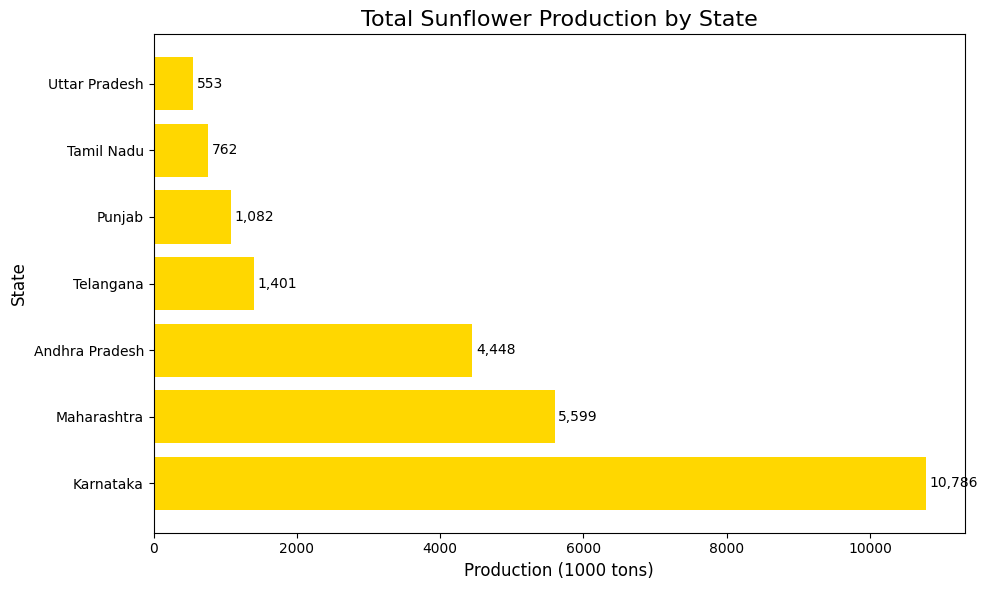

In [21]:
#Plot for Top 7 SUNFLOWER PRODUCTION  State
plt.figure(figsize=(10, 6))
bars = plt.barh(top7_sunflower_production_state["State Name"],top7_sunflower_production_state["Total sunflower Production(1000 tons)"], color='gold')

# Add labels & title
plt.title("Total Sunflower Production by State", fontsize=16)
plt.xlabel("Production (1000 tons)", fontsize=12)
plt.ylabel("State", fontsize=12)

# Add value labels to bars
for bar in bars:
    plt.text(
        bar.get_width() + 50,  # position slightly right of bar
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():,.0f}",
        va='center', fontsize=10
    )

# Show plot
plt.tight_layout()
plt.show()



In [30]:
#India's SUGARCANE PRODUCTION From Last 50 Years
year_sort=df.sort_values('Year',ascending=False)
last_50_years=year_sort['Year'].drop_duplicates().head(50)
df_50_years=df[df["Year"].isin(last_50_years)]
last_50_years_production=df_50_years.groupby("Year")["SUGARCANE PRODUCTION (1000 tons)"].sum().reset_index()
last_50_years_production=last_50_years_production.sort_values("Year")

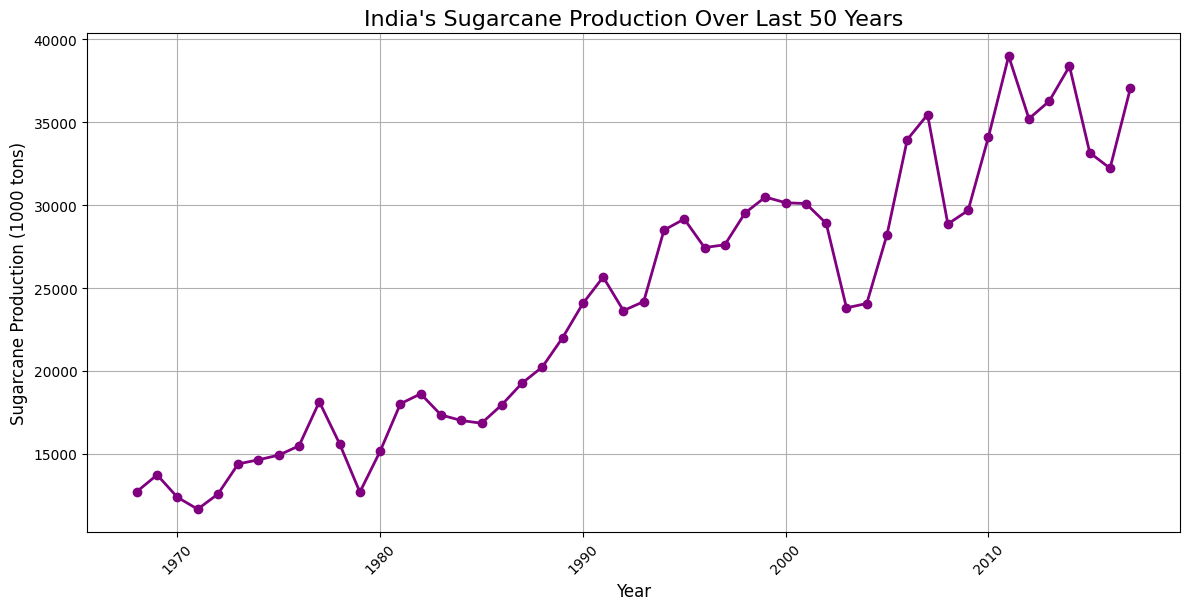

In [31]:
#India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(last_50_years_production['Year'], last_50_years_production['SUGARCANE PRODUCTION (1000 tons)'],
         color='purple', marker='o', linestyle='-', linewidth=2)

plt.title("India's Sugarcane Production Over Last 50 Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sugarcane Production (1000 tons)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [28]:
#Rice Production Vs Wheat Production (Last 50y)
years=df.groupby("Year")[["RICE PRODUCTION (1000 tons)","WHEAT PRODUCTION (1000 tons)"]].sum().reset_index()
years
last50_years=years.nlargest(50,"Year").sort_values("Year")
last50_years

,Year,RICE PRODUCTION (1000 tons),WHEAT PRODUCTION (1000 tons)
2,1968,34711.52,17385.67
3,1969,35846.01,19242.36
4,1970,39324.12,22677.88
5,1971,39946.79,25280.89
6,1972,37925.93,22879.56
7,1973,42026.94,20833.39
8,1974,37690.51,23052.96
9,1975,46144.36,27150.41
10,1976,40226.45,27580.73
11,1977,50439.41,30003.66


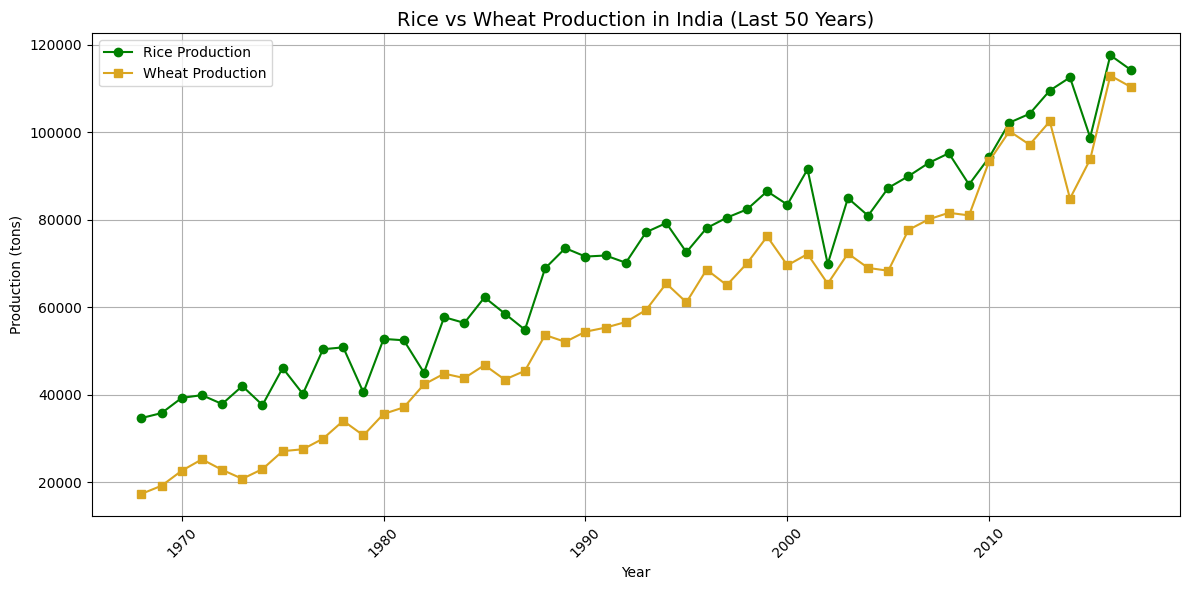

In [37]:
#Line plot of Rice Production Vs Wheat Production (Last 50y)
plt.figure(figsize=(12, 6))

plt.plot(last50_years["Year"], last50_years["RICE PRODUCTION (1000 tons)"], label="Rice Production", marker='o', color='green')
plt.plot(last50_years["Year"], last50_years["WHEAT PRODUCTION (1000 tons)"], label="Wheat Production", marker='s', color='goldenrod')

plt.title("Rice vs Wheat Production in India (Last 50 Years)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Production (tons)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
#Rice Production By West Bengal Districts
wbrice=df[df["State Name"].str.lower()=="west bengal"]
wb_dist=wbrice.groupby("Dist Name")["RICE PRODUCTION (1000 tons)"].sum().reset_index()
wb_dist=wb_dist.sort_values("RICE PRODUCTION (1000 tons)",ascending=False)
wb_dist.columns=["Dist Name of West Bengal", "RICE PRODUCTION (1000 tons)"]
wb_dist

,Dist Name of West Bengal,RICE PRODUCTION (1000 tons)
10,Midnapur,98868.28
3,Burdwan,71422.15
0,24 Parganas,63011.99
2,Birbhum,42213.81
1,Bankura,40165.20
11,Murshidabad,37261.24
14,West Dinajpur,35224.87
6,Hooghly,30962.21
12,Nadia,28016.30
13,Purulia,23147.50


In [50]:
#Top 10 Wheat Production Years From UP
upwheat=df[df['State Name']=="Uttar Pradesh"]
upwheat10=upwheat.groupby("Year")["WHEAT PRODUCTION (1000 tons)"].sum().reset_index()
upwheat10_top=upwheat10.nlargest(10,"WHEAT PRODUCTION (1000 tons)")
upwheat10_top

,Year,WHEAT PRODUCTION (1000 tons)
51,2017,35798.60
50,2016,35120.90
45,2011,32271.69
47,2013,31611.63
44,2010,30602.91
42,2008,29110.93
46,2012,29041.28
43,2009,27910.80
49,2015,27010.39
37,2003,26445.45


In [34]:
#Millet Production (Last 50y)
millet=df.groupby("Year")[["KHARIF SORGHUM PRODUCTION (1000 tons)","RABI SORGHUM PRODUCTION (1000 tons)","SORGHUM PRODUCTION (1000 tons)","PEARL MILLET PRODUCTION (1000 tons)","FINGER MILLET PRODUCTION (1000 tons)","MINOR PULSES PRODUCTION (1000 tons)"]].sum().reset_index()
millet_50=millet.sort_values("Year",ascending=False).head(50)
millet_50

,Year,KHARIF SORGHUM PRODUCTION (1000 tons),RABI SORGHUM PRODUCTION (1000 tons),SORGHUM PRODUCTION (1000 tons),PEARL MILLET PRODUCTION (1000 tons),FINGER MILLET PRODUCTION (1000 tons),MINOR PULSES PRODUCTION (1000 tons)
51,2017,2315.84,3476.25,5820.90,9282.15,2318.14,10750.14
50,2016,1979.27,2984.57,5002.37,9802.02,1095.72,9778.76
49,2015,1697.37,2123.17,3825.01,7805.13,1913.92,7443.40
48,2014,2433.30,3305.56,5747.18,9413.04,2132.44,6110.24
47,2013,2671.98,3564.29,6264.41,9930.81,2137.59,7784.73
46,2012,2885.20,2583.01,5553.00,8820.76,1645.51,5629.68
45,2011,3219.25,2672.24,5891.51,12413.46,2049.04,6437.02
44,2010,3409.57,3568.25,6976.15,12376.91,2281.21,7192.77
43,2009,2399.12,3778.32,6576.27,6597.51,1889.29,4989.93
42,2008,2747.30,3916.36,6880.79,8998.39,1981.27,5637.53


In [38]:
#Sorghum Production (Kharif and Rabi) by Region
kha=df.groupby("State Name")[["KHARIF SORGHUM PRODUCTION (1000 tons)","RABI SORGHUM PRODUCTION (1000 tons)"]].sum().reset_index()
kha

,State Name,KHARIF SORGHUM PRODUCTION (1000 tons),RABI SORGHUM PRODUCTION (1000 tons)
0,Andhra Pradesh,6195.47,11386.80
1,Assam,0.00,0.00
2,Bihar,125.48,0.00
3,Chhattisgarh,464.22,27.30
4,Gujarat,11373.12,4333.60
5,Haryana,1726.00,0.00
6,Himachal Pradesh,1.65,0.00
7,Jharkhand,14.54,0.00
8,Karnataka,35279.76,42753.83
9,Kerala,53.90,0.00


In [ ]:
#Top 7 States for Groundnut Production
ground=df.groupby("State Name")["GROUNDNUT PRODUCTION (1000 tons)"].sum().reset_index()
top7_ground=ground.sort_values("GROUNDNUT PRODUCTION (1000 tons)",ascending=False).head(7)
top7_ground

,State Name,GROUNDNUT PRODUCTION (1000 tons)
4,Gujarat,98321.42
0,Andhra Pradesh,57844.81
15,Tamil Nadu,57662.42
8,Karnataka,36033.05
11,Maharashtra,29002.06
14,Rajasthan,17354.29
12,Orissa,16857.48


In [52]:
#Soybean Production by Top 5 States and Yield Efficiency
soy=df.groupby("State Name")[["SOYABEAN PRODUCTION (1000 tons)","SOYABEAN YIELD (Kg per ha)"]].sum().reset_index()
top7_soy=soy.sort_values("SOYABEAN YIELD (Kg per ha)",ascending=False).head(5)
top7_soy

,State Name,SOYABEAN PRODUCTION (1000 tons),SOYABEAN YIELD (Kg per ha)
10,Madhya Pradesh,136006.52,1161169.25
11,Maharashtra,58643.93,770938.60
14,Rajasthan,21174.99,404598.94
17,Uttar Pradesh,544.46,341798.02
18,Uttarakhand,975.61,254553.66


In [56]:
#Oilseed Production in Major States
oilse=df.groupby("State Name")[["OILSEEDS PRODUCTION (1000 tons)"]].sum().reset_index()
oilseed_major=oilse.sort_values("OILSEEDS PRODUCTION (1000 tons)",ascending=False)
oilseed_major


,State Name,OILSEEDS PRODUCTION (1000 tons)
10,Madhya Pradesh,153705.79
4,Gujarat,126314.01
14,Rajasthan,122726.86
11,Maharashtra,95567.91
0,Andhra Pradesh,76888.09
15,Tamil Nadu,55275.03
8,Karnataka,52599.04
12,Orissa,28453.77
17,Uttar Pradesh,24659.98
5,Haryana,24118.60



 Rice:
 Correlation between area and production: 0.83


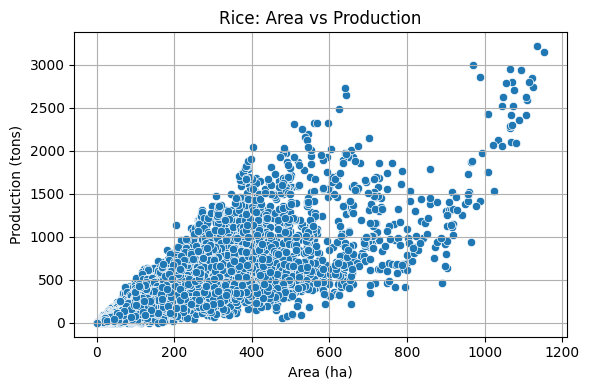


 Wheat:
 Correlation between area and production: 0.91


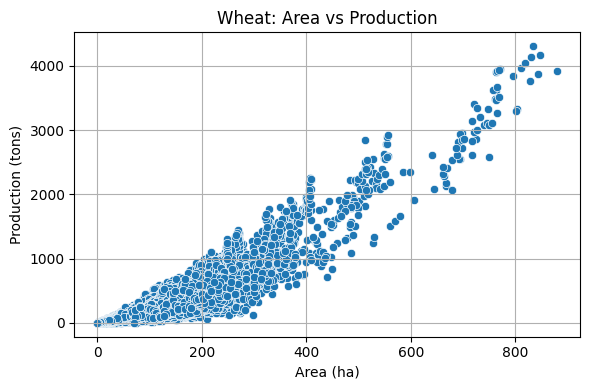


 Maize:
 Correlation between area and production: 0.80


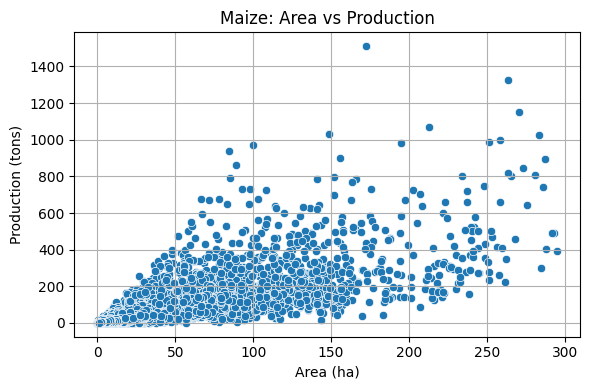

In [51]:
#Impact of Area Cultivated on Production (Rice, Wheat, Maize)
import seaborn as sns

crop_data = {
    "Rice": ("RICE AREA (1000 ha)", "RICE PRODUCTION (1000 tons)"),
    "Wheat": ("WHEAT AREA (1000 ha)", "WHEAT PRODUCTION (1000 tons)"),
    "Maize": ("MAIZE AREA (1000 ha)", "MAIZE PRODUCTION (1000 tons)")
}
for crop, (area_col, prod_col) in crop_data.items():
    print(f"\n {crop}:")

    # Correlation
    correlation = df[area_col].corr(df[prod_col])
    print(f" Correlation between area and production: {correlation:.2f}")

    # Scatter plot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[area_col], y=df[prod_col])
    plt.title(f"{crop}: Area vs Production")
    plt.xlabel("Area (ha)")
    plt.ylabel("Production (tons)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [4]:
#Rice vs. Wheat Yield Across States
rw=df.groupby("State Name")[["RICE YIELD (Kg per ha)","WHEAT YIELD (Kg per ha)"]].sum().reset_index()
rw

,State Name,RICE YIELD (Kg per ha),WHEAT YIELD (Kg per ha)
0,Andhra Pradesh,1337079.18,116956.69
1,Assam,708457.90,558080.41
2,Bihar,730287.40,992099.68
3,Chhattisgarh,335014.04,311869.75
4,Gujarat,989691.47,1991362.26
5,Haryana,796460.55,1161151.95
6,Himachal Pradesh,574244.15,630164.41
7,Jharkhand,346166.10,349397.48
8,Karnataka,2125721.28,566556.69
9,Kerala,995867.63,4000.00
